In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fredapi as fd
import plotly.express as px

In [3]:
fred = fd.Fred(api_key='api-key')

In [4]:
data = fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')

In [5]:
data.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-03-31,2023-03-31,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-03-14 07:39:01-05:00,94,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2023-03-31,2023-03-31,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-03-14 07:39:01-05:00,72,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2023-03-31,2023-03-31,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:38:17-06:00,45,None
CPILFESL,CPILFESL,2023-03-31,2023-03-31,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-03-14 07:38:02-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
APU0000708111,APU0000708111,2023-03-31,2023-03-31,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2023-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-03-14 07:34:01-05:00,81,"Large white, Grade A chicken eggs, sold in a c..."


In [48]:
data.tail(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
APUC00074715,APUC00074715,2023-03-31,2023-03-31,"Average Price: Gasoline, Unleaded Midgrade (Co...",1993-12-01,1997-12-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:32:19-05:00,1,All unleaded mid-grade gasoline. Average cons...
APUA21474713,APUA21474713,2023-03-31,2023-03-31,"Average Price: Gasoline, Leaded Premium (Cost ...",1978-01-01,1980-05-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:31:15-05:00,1,Average consumer prices are calculated for hou...
APUS49B74712,APUS49B74712,2023-03-31,2023-03-31,"Average Price: Gasoline, Leaded Regular (Cost ...",1978-01-01,1991-04-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2019-07-29 09:31:17-05:00,1,Average consumer prices are calculated for hou...


In [6]:
data['title'][0] # brings the title

'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [7]:
cpi = fred.get_series('CPIAUCSL')

In [8]:
 cpi.name = 'values'
 cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2022-10-01    297.987
2022-11-01    298.598
2022-12-01    298.990
2023-01-01    300.536
2023-02-01    301.648
Name: values, Length: 914, dtype: float64

In [9]:
df = pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [10]:
df2 = df[df['index']>'1969-12-01']
df2

,index,values
276,1970-01-01,37.900
277,1970-02-01,38.100
278,1970-03-01,38.300
279,1970-04-01,38.500
280,1970-05-01,38.600
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [15]:
fig = px.line(df2, x = 'index', y='values', title='CPI Avg. 1990-2022' )
fig.show()

#Simple fig graph

# Conditions for effecient prophet model

### Prophet model is an open source forecasting application developed by the Facebook data science team. It includes procedures that allow making annual, periodic, weekly, and daily forecasts based on nonlinear time series data.

In [22]:
!pip install prophet

In [23]:
from prophet import Prophet

In [27]:
df2 = df2.rename(columns={'index':'ds','values':'y'})
df2

,ds,y
276,1970-01-01,37.900
277,1970-02-01,38.100
278,1970-03-01,38.300
279,1970-04-01,38.500
280,1970-05-01,38.600
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [30]:
ml =Prophet()
ml.fit(df2)

18:33:59 - cmdstanpy - INFO - Chain [1] start processing
18:34:00 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future =ml.make_future_dataframe(periods=10, )  #weekly 'W'

In [34]:
future.tail()

,ds
643,2023-02-07
644,2023-02-08
645,2023-02-09
646,2023-02-10
647,2023-02-11


In [37]:
future =ml.make_future_dataframe(periods=10, freq ='MS' )  #weekly 'W'

In [38]:
future.tail()

,ds
643,2023-08-01
644,2023-09-01
645,2023-10-01
646,2023-11-01
647,2023-12-01


In [41]:
result = ml.predict(future)
result[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1970-01-01,36.192681,31.937161,41.129432
1,1970-02-01,36.536481,32.067086,41.074494
2,1970-03-01,36.320964,31.689046,40.509959
3,1970-04-01,36.604328,32.110618,41.041098
4,1970-05-01,36.892706,32.224785,41.400355
...,...,...,...,...
643,2023-08-01,283.030384,278.401792,287.812873
644,2023-09-01,283.456961,279.149912,287.952543
645,2023-10-01,283.890211,279.092755,288.277503
646,2023-11-01,284.387104,280.161497,288.767341


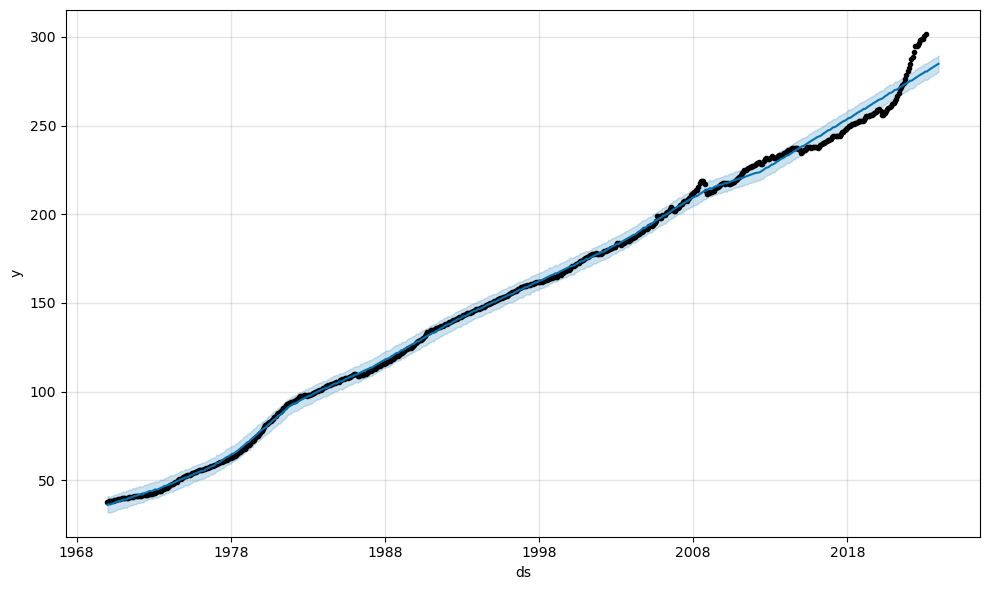

In [42]:
fig = ml.plot(result)

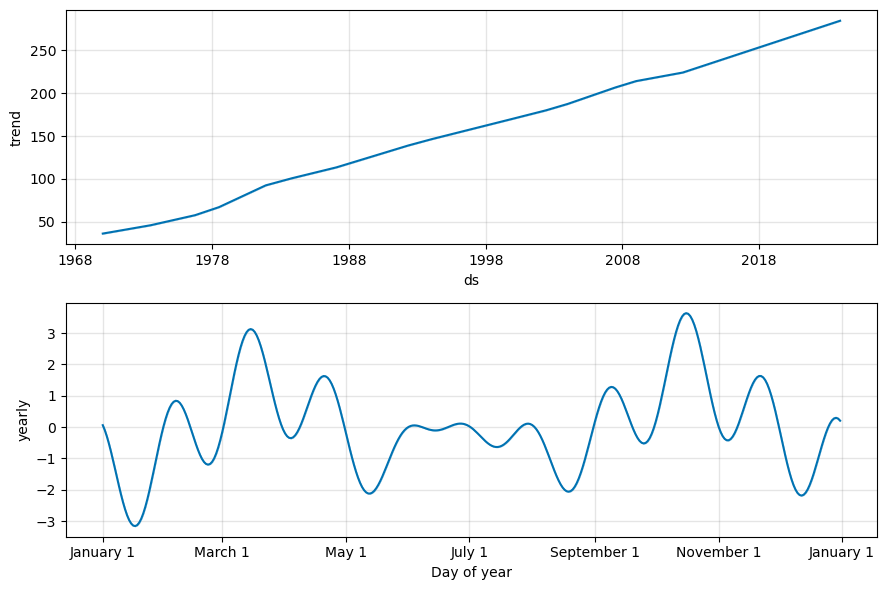

In [43]:
fig2 = ml.plot_components(result)

In [44]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_results = cross_validation(model=ml,initial=pd.to_timedelta(30*40, unit='D'), period=pd.to_timedelta(30*5, unit='D'),horizon=pd.to_timedelta(30*12, unit='D'))
df_p =performance_metrics(cv_results)

  0%|          | 0/119 [00:00<?, ?it/s]

19:01:50 - cmdstanpy - INFO - Chain [1] start processing
19:01:51 - cmdstanpy - INFO - Chain [1] done processing
19:01:51 - cmdstanpy - INFO - Chain [1] start processing
19:01:52 - cmdstanpy - INFO - Chain [1] done processing
19:01:52 - cmdstanpy - INFO - Chain [1] start processing
19:01:52 - cmdstanpy - INFO - Chain [1] done processing
19:01:52 - cmdstanpy - INFO - Chain [1] start processing
19:01:53 - cmdstanpy - INFO - Chain [1] done processing
19:01:53 - cmdstanpy - INFO - Chain [1] start processing
19:01:54 - cmdstanpy - INFO - Chain [1] done processing
19:01:54 - cmdstanpy - INFO - Chain [1] start processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] start processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] done processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:57 - cmdstanpy - INFO - Chain [1]

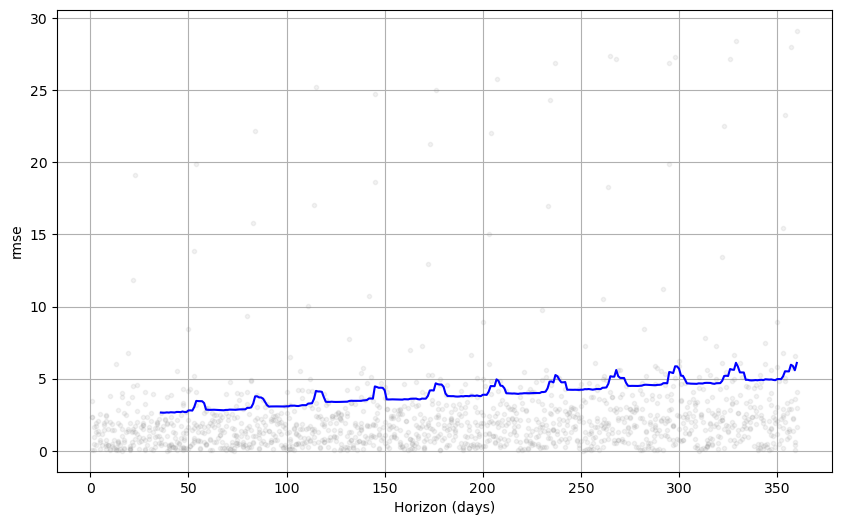

In [46]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results,metric ='rmse')